In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Base_Dados = pd.read_excel('BaseDados_RegressaoLogistica.xlsx', 'Plan1')
Base_Dados

Id Cliente  Renda  Tipo Renda  Possui Imóvel  Comprou?
0            1  10480           1              2         1
1            2   6182           2              2         1
2            3   6387           3              1         0
3            4   6528           1              2         0
4            5   8269           1              2         0
..         ...    ...         ...            ...       ...
95          96   3238           1              2         0
96          97  10701           1              2         1
97          98  14732           1              2         0
98          99   4790           1              2         1
99         100  14026           2              2         1

[100 rows x 5 columns]

In [3]:
Base_Dados.head()

Id Cliente  Renda  Tipo Renda  Possui Imóvel  Comprou?
0           1  10480           1              2         1
1           2   6182           2              2         1
2           3   6387           3              1         0
3           4   6528           1              2         0
4           5   8269           1              2         0

In [4]:
Base_Dados.tail()

Id Cliente  Renda  Tipo Renda  Possui Imóvel  Comprou?
95          96   3238           1              2         0
96          97  10701           1              2         1
97          98  14732           1              2         0
98          99   4790           1              2         1
99         100  14026           2              2         1

In [5]:
Base_Dados.describe()

Id Cliente        Renda  Tipo Renda  Possui Imóvel    Comprou?
count  100.000000    100.00000  100.000000      100.00000  100.000000
mean    50.500000   8520.77000    1.400000        1.85000    0.640000
std     29.011492   4039.01965    0.710669        0.35887    0.482418
min      1.000000   1643.00000    1.000000        1.00000    0.000000
25%     25.750000   5455.25000    1.000000        2.00000    0.000000
50%     50.500000   8824.00000    1.000000        2.00000    1.000000
75%     75.250000  12036.00000    2.000000        2.00000    1.000000
max    100.000000  14994.00000    3.000000        2.00000    1.000000

In [6]:
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id Cliente     100 non-null    int64
 1   Renda          100 non-null    int64
 2   Tipo Renda     100 non-null    int64
 3   Possui Imóvel  100 non-null    int64
 4   Comprou?       100 non-null    int64
dtypes: int64(5)
memory usage: 4.0 KB


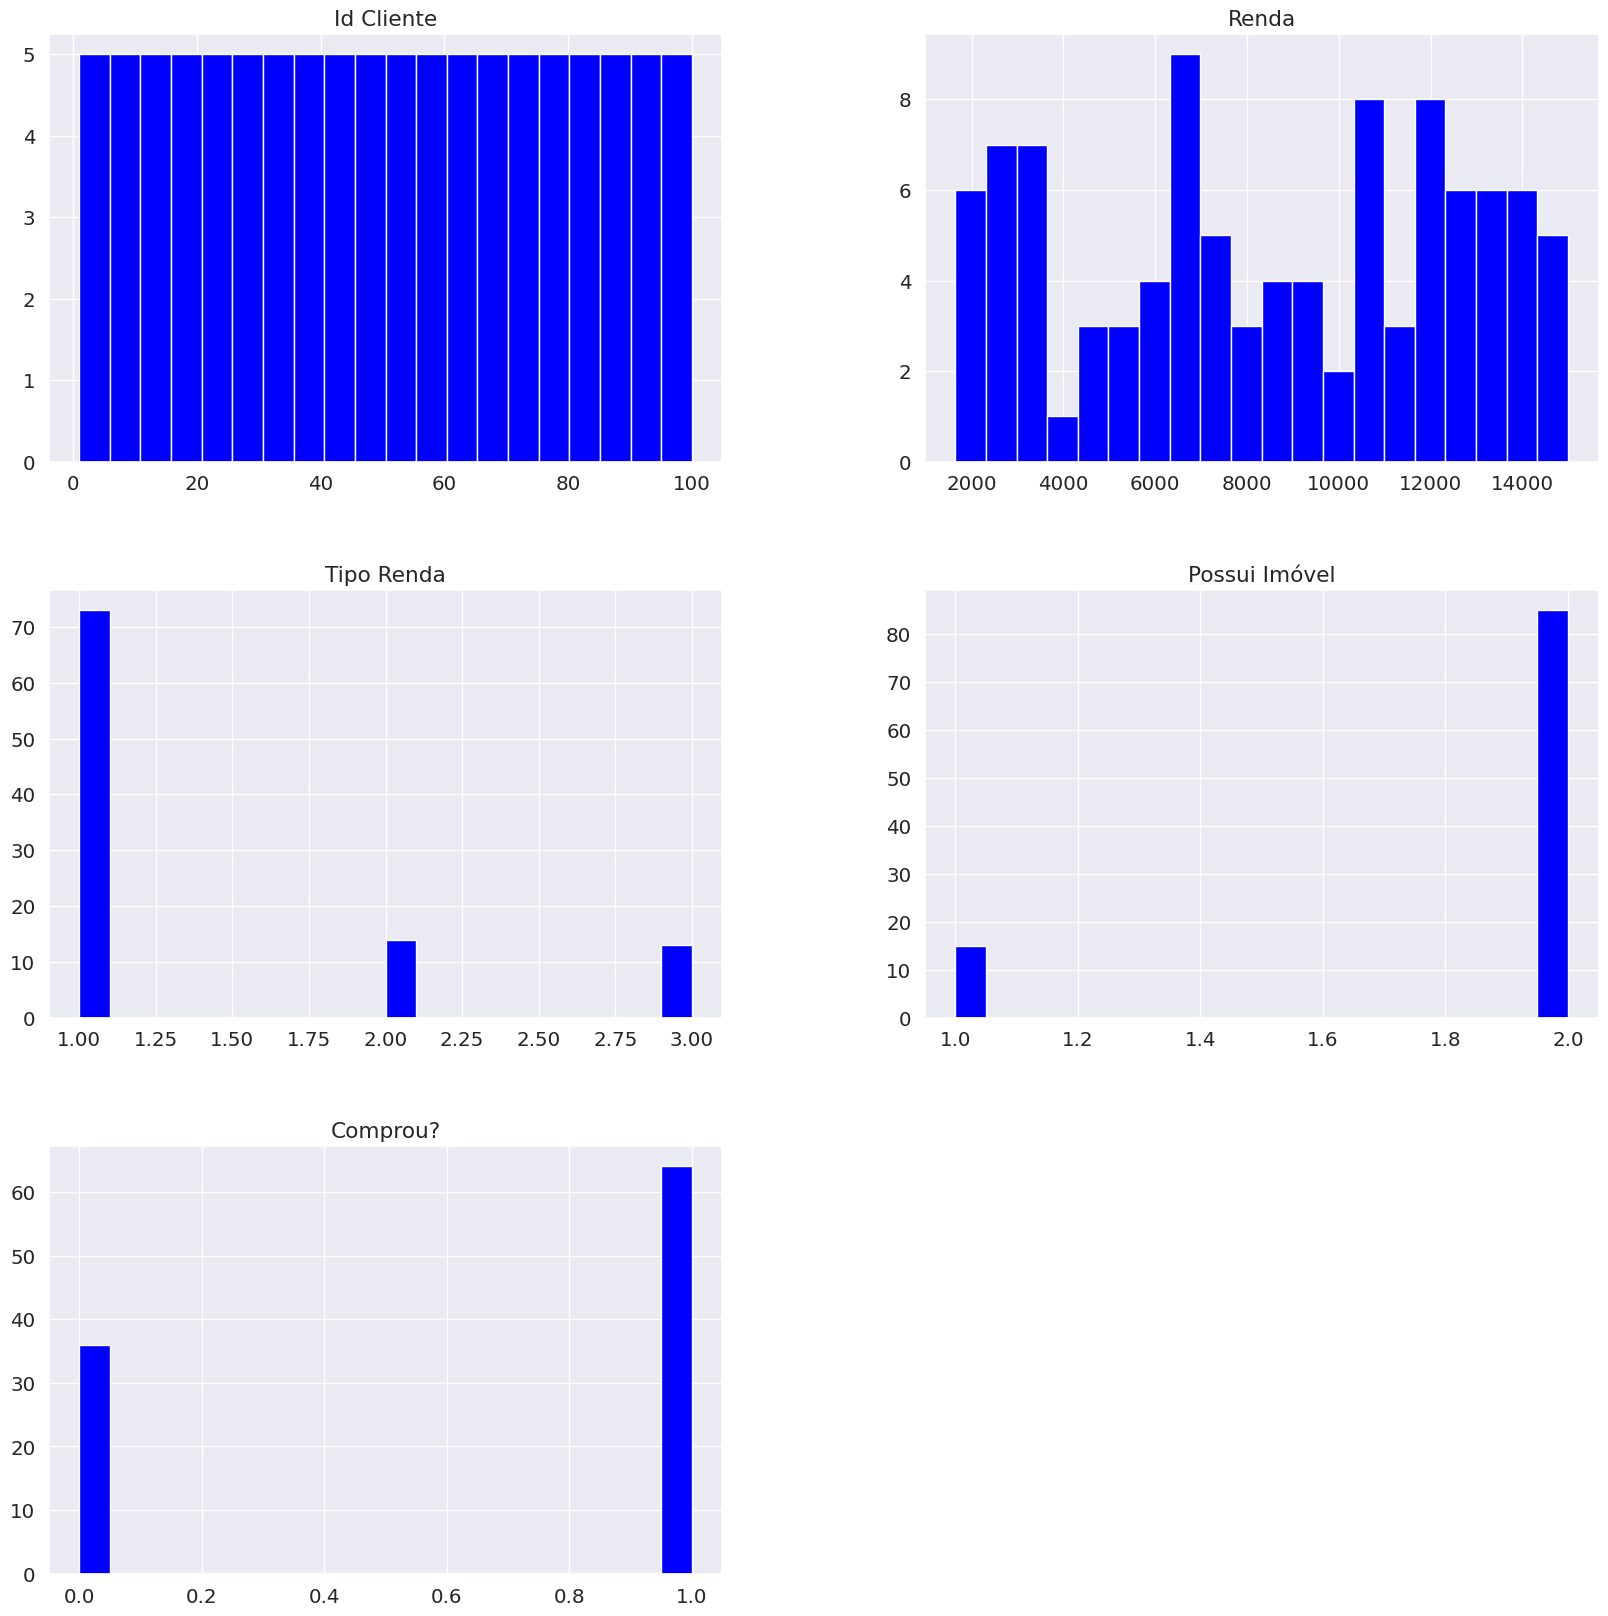

In [7]:
sns.set(font_scale=1.3, rc={'figure.figsize':(20,20)})
eixo = Base_Dados.hist(bins=20, color='blue')

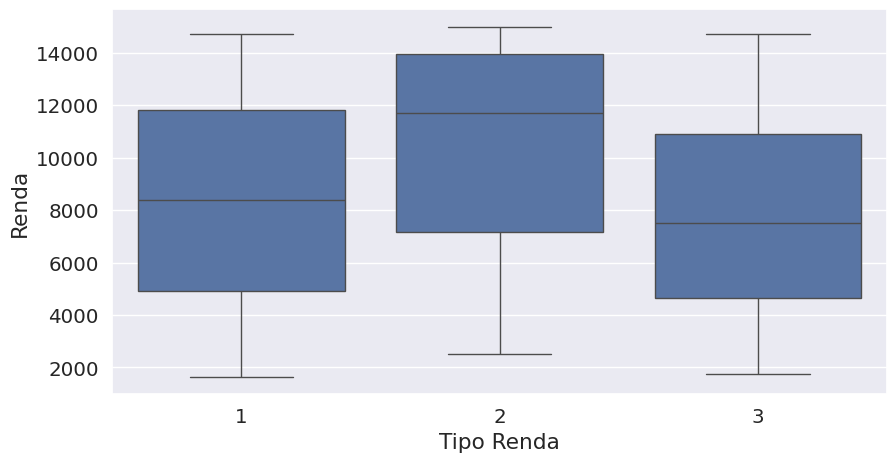

In [8]:
plt.figure(figsize=(10,5))
sns.boxplot(data=Base_Dados, x='Tipo Renda', y='Renda');

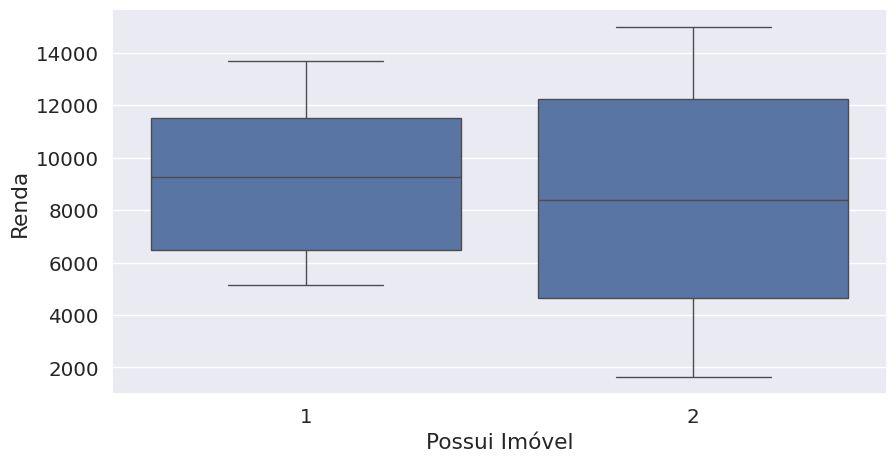

In [9]:
plt.figure(figsize=(10,5))
sns.boxplot(data=Base_Dados, x='Possui Imóvel', y='Renda');

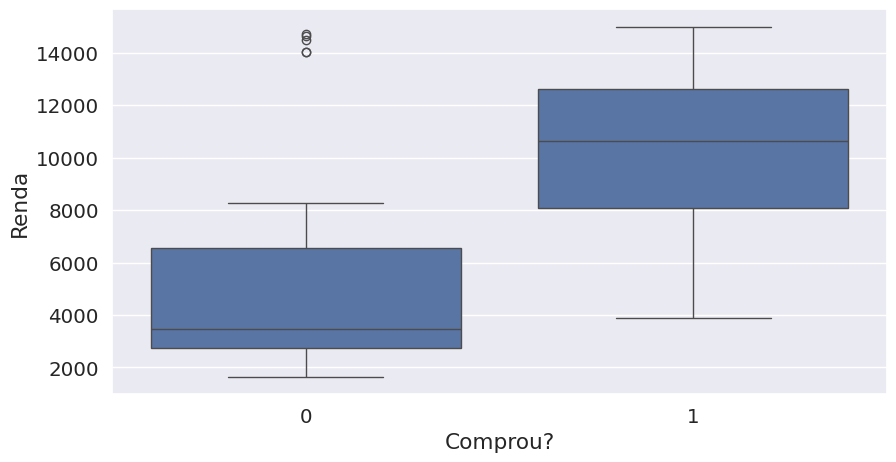

In [10]:
plt.figure(figsize=(10,5))
sns.boxplot(data=Base_Dados, x='Comprou?', y='Renda');

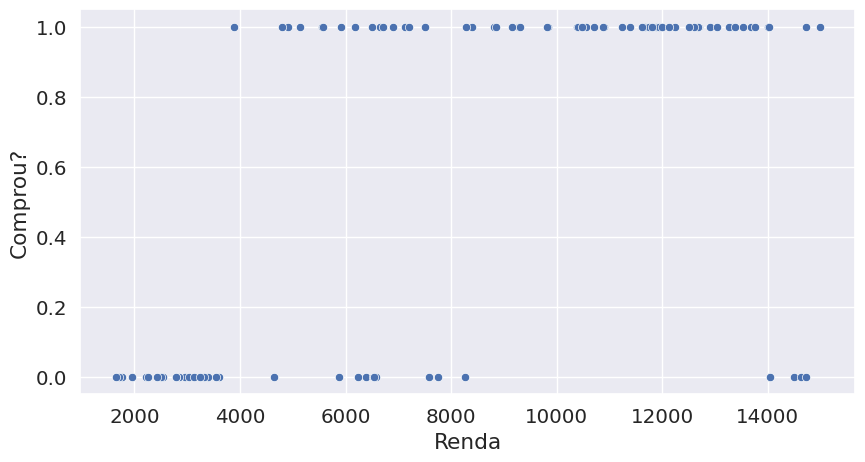

In [11]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=Base_Dados, x='Renda', y='Comprou?');
#

In [12]:
Caracteristicas = Base_Dados.iloc[:,1:4].values
Previsor = Base_Dados.iloc[:,4:5].values

In [15]:
from sklearn.model_selection import train_test_split

x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(Caracteristicas, Previsor, test_size=0.20)

In [16]:
from sklearn.linear_model import LogisticRegression

Funcao_Regressao_Logistica = LogisticRegression()
Funcao_Regressao_Logistica.fit(x_treinamento, y_treinamento)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [17]:
Previsoes = Funcao_Regressao_Logistica.predict(x_teste)

In [18]:
Previsoes

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [20]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_teste, Previsoes)

array([[ 4,  2],
       [ 1, 13]])

In [22]:
from sklearn.metrics import classification_report

print(classification_report(y_teste, Previsoes))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.87      0.93      0.90        14

    accuracy                           0.85        20
   macro avg       0.83      0.80      0.81        20
weighted avg       0.85      0.85      0.85        20



In [27]:
# Nova previsão - cliente novo
Salario = 5500
Tipo_Renda = 3
Possui_Imovel = 2

novo_cliente = [[Salario, Tipo_Renda, Possui_Imovel]]

Fazendo_Previsao = Funcao_Regressao_Logistica.predict(novo_cliente)
Probabilidade = Funcao_Regressao_Logistica.predict_proba(novo_cliente)

if Fazendo_Previsao == 0:
    print('Cliente não vai comprar')
    print(Probabilidade)
else:
    print('Cliente vai comprar \o/')
    print(Probabilidade)

Cliente não vai comprar
[[0.68299767 0.31700233]]
